# S03 T04: Pràctica amb programació numèrica

# Nivell 1
## Exercici 1. Crea una funció que donat un Array d’una dimensió, et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.


In [50]:
import numpy as np
from numpy import random
import statistics 
from scipy.stats import mode
from numpy import mean, median, ptp, var, std, cov, corrcoef

undarray = random.randint(10, size=(10))   #creamos un array de una dimensión para comprobar
print(undarray)

print("the array has " + (str(undarray.ndim)) + " dimension")  #Verificamos el número de dimensiones del array
print(np.mean(undarray))          #Pedimos los estadísticos básicos para comparar con la función que crearemos
print(np.median(undarray))
print(np.max(undarray))
print(np.min(undarray))
print(np.ptp(undarray))
print(np.var(undarray))
print(np.std(undarray))
print(np.corrcoef(undarray))

def esta_basics(undarray):                #Definimos una función para las estadísticas básicas
    if undarray.ndim > 1:
        print("error, the array has more than one dimension")
    else:
        print("media: " + str(np.mean(undarray)))
        print("mediana: "+ str(np.median(undarray)))
        print("valor máximo: "+ str(np.max(undarray)))
        print("valor mínimo: "+ str(np.min(undarray)))
        print("rango: " + str(np.ptp(undarray)))
        print("Varianza: " + str(np.var(undarray)))
        print("Desviación estandar: " + str(np.std(undarray)))
        print("coeficiente de correlación: "+ str(np.corrcoef(undarray)))
esta_basics(undarray)
    

[0 8 4 2 2 2 7 6 8 4]
the array has 1 dimension
4.3
4.0
8
0
8
7.210000000000001
2.685144316419511
1.0
media: 4.3
mediana: 4.0
valor máximo: 8
valor mínimo: 0
rango: 8
Varianza: 7.210000000000001
Desviación estandar: 2.685144316419511
coeficiente de correlación: 1.0


## Exercici 2. Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.


In [74]:
import numpy as np
from numpy import random

n = random.randint(100, size = (5,5))
print(n)

[[74  1 23 61 24]
 [74 86 33 67 63]
 [63 69  0 55 28]
 [62 25 23 89  2]
 [89 26 25 31 53]]


## Exercici 3. Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna.


In [75]:
array = random.randint (100, size = (3,2))
print(array)
a = array.sum(axis =0) # total por columnas
print("total por columnas " + str(a))
b = array.sum(axis=1) # total por filas
print("total por filas "+ str(b))


[[37 32]
 [68 90]
 [62  3]]
total por columnas [167 125]
total por filas [ 69 158  65]


## Exercici 4. Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.


__coeficiente de correlación__
\begin{equation*}
r = \frac{\sum (x_{i} - \bar{x}) (y_{i}- \bar{y})} {\sqrt\sum (x_{i} - \bar{x})^{2} \sum(y_{i} - \bar{y})^{2} }
\end{equation*}

__coeficiente de correlación__
\begin{equation*}
r(x,y) = \frac{COV(x,y)}{S(x) S(y)}
\end{equation*}


    edad  estres_eco
0     26           6
1     18           2
2     29           6
3     20           6
4     28           7
5     19           5
6     26           7
7     27           9
8     23           5
9     20           4
10    24           7
11    26           8
12    25           7
13    27           6
14    26           5
15    24           6
16    22           7
17    18           2
18    28           5
19    28           6
20    27           7


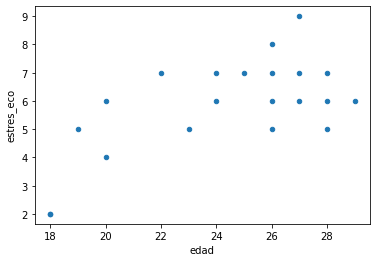

                 edad  estres_eco
edad        11.841270    3.714286
estres_eco   3.714286    2.789116
La covarianza es: 3.7142857142857135
3.441114621931365
1.6700645635000175
5.746883589029332
El coeficiente de correlación es: 0.6463130245714737


,edad,estres_eco
edad,1.000000,0.646313
estres_eco,0.646313,1.000000


In [131]:
#creamos dos listas y las transformamos en DataFrame
import pandas as pd
import matplotlib.pyplot as plt

data = {
  "edad": [26, 18, 29, 20, 28, 19, 26, 27, 23, 20, 24, 26, 25, 27, 26, 24, 22, 18, 28, 28,27],
  "estres_eco": [6, 2, 6, 6, 7, 5, 7, 9, 5, 4, 7, 8, 7, 6, 5, 6, 7, 2, 5, 6,7]  
}

#load data into a DataFrame object:
my_df = pd.DataFrame(data)
print(my_df)

my_df.plot(kind = 'scatter', x = 'edad', y = 'estres_eco')

plt.show()    #visualizamos los datos

# calcular las diferentes partes de la ecuación para dos muestras: covariance y desviación típica

#calculamos la covarianza, que es el numerador
cov_df = my_df.cov(ddof=0)
print(cov_df)
numerador = cov_df.loc["edad", "estres_eco"]
print("La covarianza es: " + str(numerador))

#calculamos la desviación típica para cada columna. El producto de ambos es el denominador
std_edad= my_df["edad"].std(ddof=0)
print(std_edad)
std_stres=my_df["estres_eco"].std(ddof=0)
print(std_stres)

denom = std_edad*std_stres
print(denom)

#calculamos el coeficiente de correlación
coef_corr = num/denom
print("El coeficiente de correlación es: " + str(coef_corr))

#Comparamos con el cálculo directo con la función 
corr_df= my_df.corr()
corr_df